<a href="https://colab.research.google.com/github/LuizHuallpa/VolatilidadexRendimento/blob/main/VolatilidadeXRendimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matriz de Risvo X Retorno

Importando e instalando as bibliotecas

In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
import yfinance as yf


Array com as ações a serem analisadas(Para ações brasileiras coloque o ".SA" no final)

In [ ]:
acoes = ['PETR4.SA','VALE3.SA', 'WEGE3.SA', 'LOGN3.SA', 'ITUB4.SA', 'RADL3.SA', 'B3SA3.SA', 'SMAL11.SA', 'VIIA3.SA', 'BOVA11.SA']

Periodo a ser analisado

In [ ]:
begin = '2021-01-01'
finish = '2021-09-28'

Importando os dados de yfinance e calculando a variação percentual

In [ ]:
precos = pd.DataFrame()

for i in acoes:
  precos[i] = yf.download(i, start = begin, end = finish)['Adj Close']

ativos_retorno = precos.pct_change()


ativos_retorno = ativos_retorno.dropna()
ativos_retorno.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,PETR4.SA,VALE3.SA,WEGE3.SA,LOGN3.SA,ITUB4.SA,RADL3.SA,B3SA3.SA,SMAL11.SA,VIIA3.SA,BOVA11.SA
Date,,,,,,,,,,
2021-01-05,0.039087,0.016838,0.061377,-0.030361,-0.006473,-0.002797,0.001968,-0.002239,0.003092,0.005259
2021-01-06,0.001997,0.032796,0.026515,-0.045010,0.029316,-0.023237,-0.016367,-0.019746,-0.045006,0.007498
2021-01-07,0.029900,0.065278,0.041328,0.023907,0.038924,-0.012715,0.027953,-0.000839,-0.026469,0.024405
2021-01-08,0.003871,-0.003127,0.060477,0.024016,-0.000305,0.029082,0.014730,0.012066,0.029841,0.017150
2021-01-11,-0.008355,-0.000196,-0.030630,-0.008469,-0.022547,-0.005248,-0.041155,0.006565,-0.026401,-0.014784


Calculando o desvio padrão de uma ação no periodo, conseguimos saber a sua volatilidade

---



In [ ]:
volatilidade = pd.DataFrame(ativos_retorno.std(), columns= ['Volatilidade'])

Com a média da variação vemos os retornos do ativo

In [ ]:
retornos = pd.DataFrame(ativos_retorno.sum(), columns = ['Retornos'])

Chegamos a Matriz

In [ ]:
risco_retorno = pd.concat([retornos, volatilidade], axis = 1)
risco_retorno  

,Retornos,Volatilidade
PETR4.SA,0.104555,0.028612
VALE3.SA,0.053628,0.021158
WEGE3.SA,0.149200,0.023106
LOGN3.SA,0.468454,0.037933
ITUB4.SA,-0.007267,0.019412
RADL3.SA,0.030053,0.019705
B3SA3.SA,-0.325617,0.022078
SMAL11.SA,0.005139,0.015038
VIIA3.SA,-0.606318,0.030493
BOVA11.SA,-0.030552,0.013326


Agora plotando os dados

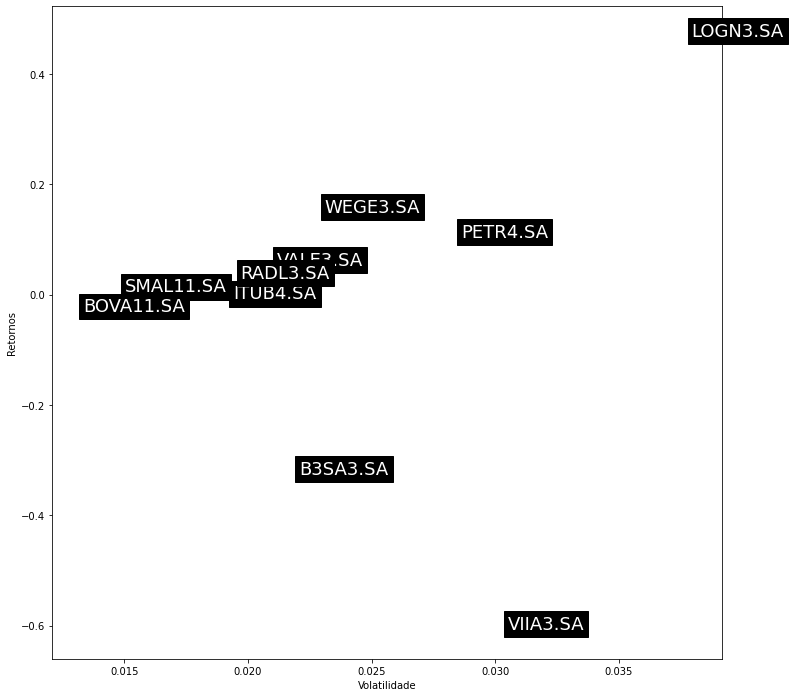

In [ ]:
plt.subplots(figsize = (12,12))

sns.scatterplot(data = risco_retorno, x = 'Volatilidade', y = 'Retornos')

for i in range(risco_retorno.shape[0]):
  plt.text(x = risco_retorno.Volatilidade[i], y = risco_retorno.Retornos[i],
           s = risco_retorno.index[i],
           fontdict = dict(color = 'white', size = 18),
           bbox = dict(facecolor = 'black'))


Aqui o que procuramos são ações que esteja com a menor volatilidade e maiores rendimentos, ou seja, aquelas que estão mais próximas do canto superior esquerdo.

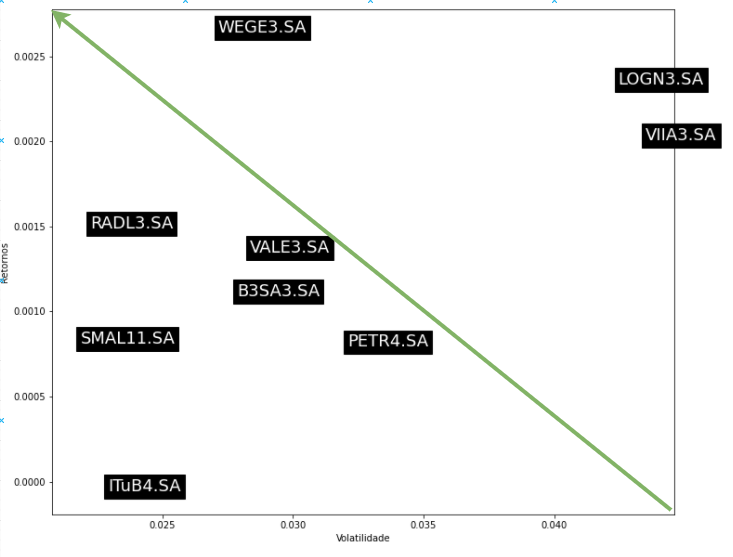

